# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
!pip3 install citipy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

city_name = []
lat = []
lon = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

for i, city in enumerate(cities):
    query_url = f"{url}appid={weather_api_key}&units={units}&q="
    try:
        response = requests.get(f"{query_url}{city}").json()
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        print(f"Loading city: {i} {city}")
    except:
        print("City not found")
    pass


Loading city: 0 georgetown
Loading city: 1 sembe
City not found
Loading city: 3 leningradskiy
Loading city: 4 busselton
Loading city: 5 sao gabriel da cachoeira
Loading city: 6 east london
City not found
Loading city: 8 kavieng
Loading city: 9 rawson
Loading city: 10 den helder
Loading city: 11 pontes e lacerda
Loading city: 12 sakakah
Loading city: 13 vaini
Loading city: 14 port hardy
Loading city: 15 chirilagua
Loading city: 16 cervo
City not found
Loading city: 18 nikolskoye
Loading city: 19 hobart
Loading city: 20 castro
Loading city: 21 alamogordo
Loading city: 22 vostok
Loading city: 23 punta arenas
City not found
City not found
Loading city: 26 kyshtovka
Loading city: 27 port elizabeth
Loading city: 28 riyadh
Loading city: 29 kapaa
Loading city: 30 kulim
Loading city: 31 bambous virieux
Loading city: 32 inhambane
Loading city: 33 provideniya
Loading city: 34 kahului
Loading city: 35 hithadhoo
Loading city: 36 viedma
Loading city: 37 iskateley
Loading city: 38 kongsvinger
Loading

Loading city: 313 putina
City not found
Loading city: 315 ayan
Loading city: 316 kununurra
Loading city: 317 tessalit
Loading city: 318 ambulu
Loading city: 319 nortelandia
Loading city: 320 kristiinankaupunki
Loading city: 321 inirida
Loading city: 322 pierre
Loading city: 323 jalu
City not found
Loading city: 325 praia da vitoria
Loading city: 326 muros
Loading city: 327 sitka
Loading city: 328 owando
Loading city: 329 marawi
Loading city: 330 oktyabrskiy
Loading city: 331 abu dhabi
Loading city: 332 axim
Loading city: 333 staryy nadym
Loading city: 334 cherskiy
Loading city: 335 nouadhibou
Loading city: 336 motomiya
Loading city: 337 broome
Loading city: 338 pisco
Loading city: 339 nyagan
Loading city: 340 quilali
Loading city: 341 berdigestyakh
Loading city: 342 port alfred
Loading city: 343 alofi
Loading city: 344 usinsk
Loading city: 345 henties bay
Loading city: 346 beaverlodge
Loading city: 347 ostrovnoy
Loading city: 348 dingle
Loading city: 349 vanavara
Loading city: 350 aden

Loading city: 622 sorong
Loading city: 623 narsaq


In [33]:
weather_df = pd.DataFrame({"City": city_name,
                     "Latitude": lat,
                     "Longitude": lon,
                     "Max Temp": max_temp,
                     "Humidity": humidity,
                     "Cloudiness": cloudiness,
                     "Wind Speed": wind_speed,
                     "Country": country,
                     "Date": date
                    })

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [34]:
weather_csv = weather_df.to_csv("./weather_csv")

In [35]:
weather_df

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,George Town,5.4112,100.3354,89.01,66,20,8.05,MY,1611728730
1,Sémbé,1.6481,14.5806,70.61,92,52,2.93,CG,1611728360
2,Leningradskiy,69.3833,178.4167,-22.45,86,94,3.85,RU,1611728853
3,Busselton,-33.6500,115.3333,73.99,45,0,8.01,AU,1611728831
4,São Gabriel da Cachoeira,-0.1303,-67.0892,71.20,98,76,0.74,BR,1611728722
...,...,...,...,...,...,...,...,...,...
577,Lewisporte,49.2499,-55.0482,28.40,93,90,21.85,CA,1611728976
578,Dhidhdhoo,6.8833,73.1000,81.36,59,100,8.41,MV,1611728976
579,Maxixe,-23.8597,35.3472,86.00,79,40,9.22,MZ,1611728977
580,Sorong,-0.8833,131.2500,81.37,76,97,7.96,ID,1611728977


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [36]:
# No cities in my dataframe has a humidity level over 100%

high_humidity = weather_df.loc[weather_df["Humidity"] > 100]


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

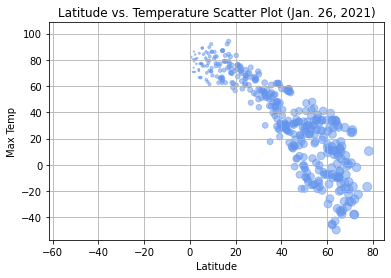

In [52]:
x_axis = weather_df["Latitude"]
y_axis = weather_df["Max Temp"]

plt.scatter(x_axis, y_axis, marker="o", facecolors="cornflowerblue", s=x_axis, alpha=0.5)

plt.title("Latitude vs. Temperature Scatter Plot (Jan. 26, 2021)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.grid(True)

## Latitude vs. Humidity Plot

## Latitude vs. Cloudiness Plot

## Latitude vs. Wind Speed Plot

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression